# Neutrino Parameter Estimation from Oscillation Probability Maps using MCMC

## Generate random inputs: Maps after Matter Effect

We use a simulator that generates 9 oscillation probability maps:

| Transition ↓ / Source → | $\nu_e$ (source) | $\nu_\mu$ (source) | $\nu_\tau$ (source) |
|--------------------------|------------------|--------------------|---------------------|
| **$\nu_e$ (detected)**  | $P(\nu_e \leftarrow \nu_e)$ | $P(\nu_e \leftarrow \nu_\mu)$ | $P(\nu_e \leftarrow \nu_\tau)$ |
| **$\nu_\mu$ (detected)** | $P(\nu_\mu \leftarrow \nu_e)$ | $P(\nu_\mu \leftarrow \nu_\mu)$ | $P(\nu_\mu \leftarrow \nu_\tau)$ |
| **$\nu_\tau$ (detected)** | $P(\nu_\tau \leftarrow \nu_e)$ | $P(\nu_\tau \leftarrow \nu_\mu)$ | $P(\nu_\tau \leftarrow \nu_\tau)$ |


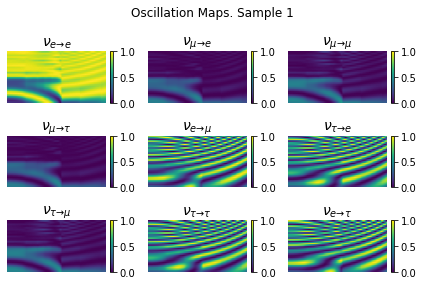

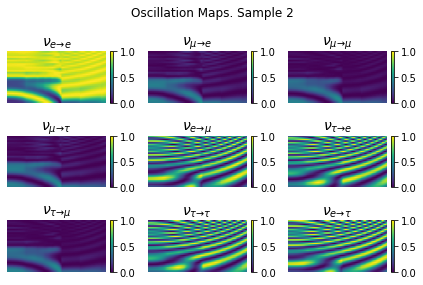

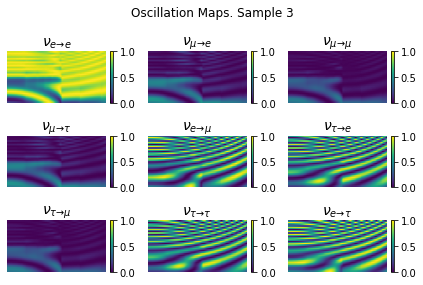

In [1]:
from NuOscParam.utils import *
from NuOscParam.Data.DataRanges import *
from NuOscParam.Data.OscIterableDataset import OscIterableDataset
%matplotlib inline

# Configure generator
generator = iter(OscIterableDataset(ranges=NEUTRINO_RANGES, pred_param="ALL", return_params=True, mode='earth',
                                    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")))
# Generate three random maps
X_test, Osc_params = [], []
n_samples = 3
for i in range(n_samples):
    xtest, _, osc_pars, _ = next(generator)  # Generate 1 sample
    X_test.append(xtest)
    Osc_params.append(osc_pars)
    # Plot oscillation maps
    input_image = xtest[0, :, :, :].permute(2, 1, 0)
    plot_osc_maps(input_image, title=f"Oscillation Maps. Sample {i+1}")
X_test = torch.cat(X_test, dim=0)

## Delayed-acceptance MCMC Demonstration

This is a demonstration of the delayed-acceptance MCMC procedure, which, in our paper, was used as a baseline method for comparison. The `evaluate` method returns the MCMC predicions as well as the 90% confidence intervals (CIs) (*Note that a CI is not the same as a prediction interval)

In [2]:
from NuOscParam.MCMC.RunMCMC import RunMCMC
executor = RunMCMC(mode="earth")
pred_OscParams = executor.evaluate(X_test)

  0%|          | 0/3 [00:00<?, ?it/s]


*************************************************
Analyzing sample 1/3
*************************************************


 33%|███▎      | 1/3 [08:11<16:23, 491.95s/it]

	Inferred parameters:  [33.539337, 43.153824, 8.200072, 354.428, 7.1470786e-05, 0.0025434184]
	CI Lower bounds:  [33.51450732420822, 43.15131090990747, 8.200048591956568, 354.3187337123502, 7.129213093374621e-05, 0.002543319357973587]
	CI Upper bounds:  [33.54265041434455, 43.172287312151184, 8.200270512358454, 355.249561397315, 7.149274755804732e-05, 0.002543427761870149]

*************************************************
Analyzing sample 2/3
*************************************************


 67%|██████▋   | 2/3 [16:35<08:18, 498.63s/it]

	Inferred parameters:  [32.76121, 45.522797, 8.200004, 182.88419, 6.885259e-05, 0.0025682705]
	CI Lower bounds:  [32.75346516640088, 45.52187580825172, 8.200001916126073, 182.8837850931587, 6.883490557388477e-05, 0.0025682670246907216]
	CI Upper bounds:  [32.806355137168325, 45.52319356622871, 8.20001701375962, 182.89197749222646, 6.896925840057905e-05, 0.0025682902944940333]

*************************************************
Analyzing sample 3/3
*************************************************


100%|██████████| 3/3 [25:33<00:00, 511.25s/it]

	Inferred parameters:  [34.465576, 48.395973, 8.769684, 193.10956, 7.479991e-05, 0.0024869558]
	CI Lower bounds:  [34.41922900197141, 48.390673746478924, 8.769547518099904, 193.08484461762393, 7.479953029369357e-05, 0.0024869500769189364]
	CI Upper bounds:  [34.47060269555395, 48.396894117723356, 8.770967548176785, 193.3754881701728, 7.482438623910343e-05, 0.002486989203355245]


In [3]:
import pandas as pd
param_names = [r"$\theta_{12}$", r"$\theta_{23}$", r"$\theta_{13}$", r"$\delta_{CP}$", r"$\Delta m^2_{21}$", r"$\Delta m^2_{31}$"]
for i in range(n_samples):
    print("*" * 80)
    print(f"Results: Sample {i + 1}")
    print("*" * 80)
    df = pd.DataFrame({"Original": Osc_params[i].cpu().numpy().flatten(),
                       "CI Lower Bound": pred_OscParams[2][i, :].flatten(),
                       "Predicted": pred_OscParams[0][i, :].flatten(),
                       "CI Upper Bound": pred_OscParams[1][i, :].flatten()}, index=param_names)
    display(df)

********************************************************************************
Results: Sample 1
********************************************************************************


,Original,CI Lower Bound,Predicted,CI Upper Bound
$\theta_{12}$,33.640900,33.514507,33.539337,33.542650
$\theta_{23}$,43.153336,43.151311,43.153824,43.172287
$\theta_{13}$,8.183366,8.200049,8.200072,8.200271
$\delta_{CP}$,354.322632,354.318734,354.428009,355.249561
$\Delta m^2_{21}$,0.000071,0.000071,0.000071,0.000071
$\Delta m^2_{31}$,0.002543,0.002543,0.002543,0.002543


********************************************************************************
Results: Sample 2
********************************************************************************


,Original,CI Lower Bound,Predicted,CI Upper Bound
$\theta_{12}$,33.696301,32.753465,32.761211,32.806355
$\theta_{23}$,45.472229,45.521876,45.522797,45.523194
$\theta_{13}$,8.023399,8.200002,8.200004,8.200017
$\delta_{CP}$,184.290314,182.883785,182.884186,182.891977
$\Delta m^2_{21}$,0.000069,0.000069,0.000069,0.000069
$\Delta m^2_{31}$,0.002569,0.002568,0.002568,0.002568


********************************************************************************
Results: Sample 3
********************************************************************************


,Original,CI Lower Bound,Predicted,CI Upper Bound
$\theta_{12}$,34.500393,34.419229,34.465576,34.470603
$\theta_{23}$,48.391716,48.390674,48.395973,48.396894
$\theta_{13}$,8.769719,8.769548,8.769684,8.770968
$\delta_{CP}$,193.552994,193.084845,193.109558,193.375488
$\Delta m^2_{21}$,0.000075,0.000075,0.000075,0.000075
$\Delta m^2_{31}$,0.002487,0.002487,0.002487,0.002487
